Prepare a model for glass classification using KNN

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/content/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df=data.copy()

In [4]:
df.shape

(214, 10)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.loc[df['Type'] == 1, 'Type'] = 'building_windows_float_processed'
df.loc[df['Type'] == 2, 'Type'] = 'building_windows_non_float_processed' 
df.loc[df['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed' 
df.loc[df['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed' 
df.loc[df['Type'] == 5, 'Type'] = 'containers' 
df.loc[df['Type'] == 6, 'Type'] = 'tableware' 
df.loc[df['Type'] == 7, 'Type'] = 'headlamps'

In [26]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,headlamps
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,headlamps


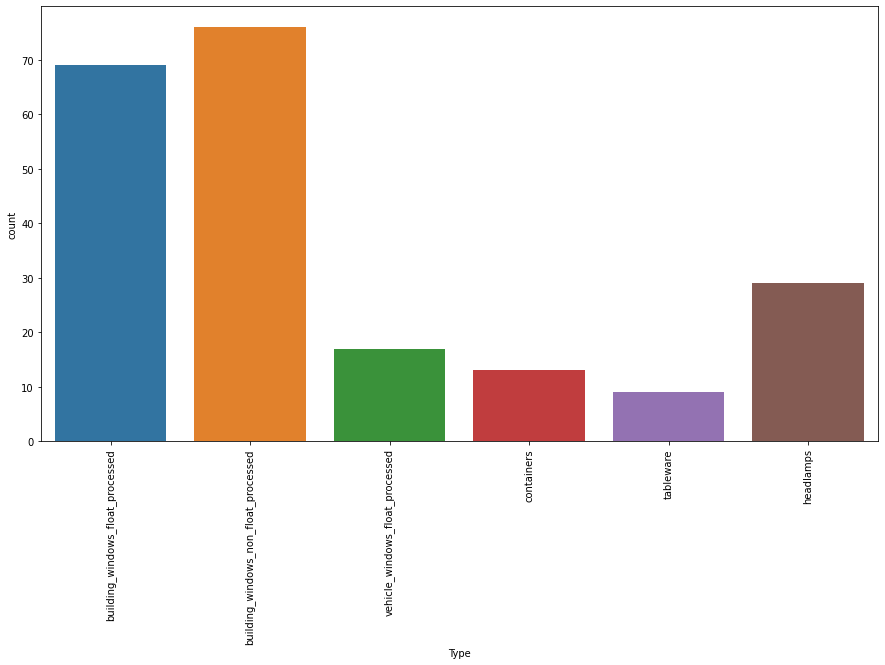

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(df['Type'])
plt.xticks(rotation=90)
plt.show()

In [24]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


Building K Nearest Neighbour Model

In [25]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed


In [27]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [30]:
y.value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        69
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Type, dtype: int64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
training_accuracy=[]
test_accuracy=[]

In [34]:
for i in range(1,25):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  training_accuracy.append(knn.score(X_train,y_train))
  test_accuracy.append(knn.score(X_test,y_test))

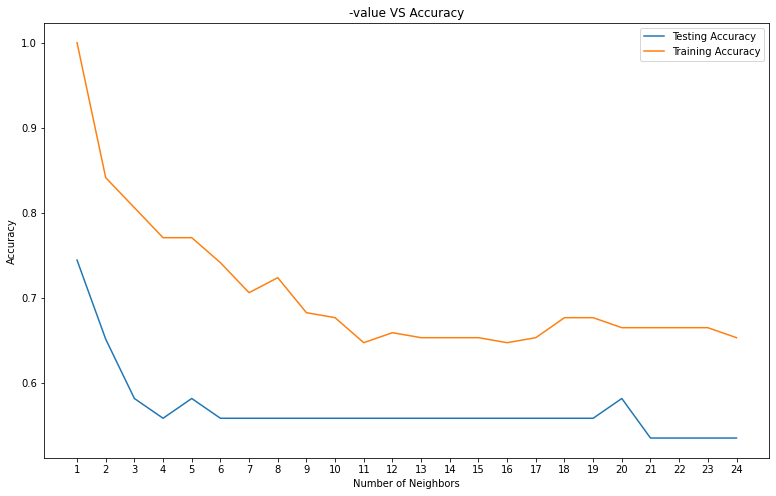

In [35]:
plt.figure(figsize=[13,8])
plt.plot(range(1,25), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,25), training_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(1,25))
plt.show()

K=5 produces most accurate result

In [36]:
knn1=KNeighborsClassifier(n_neighbors=4)

In [37]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [38]:
y_pred=knn1.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.5581395348837209

In [42]:
score_knn=cross_val_score(knn1, X,y, cv=10)

In [43]:
score_knn.mean()

0.6244588744588745